## What is a probablility?

In simple words- "An intuitive notion of odds is Probability!"

### using random number generator in numpy.

In [60]:
%matplotlib inline

import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import time
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

In [61]:
def throw_a_coin(N):
    return np.random.choice(['H','T'], size=N)
throws = throw_a_coin(80)
print "Throws: ", " ".join(throws)
print "Number of Heads : ", np.sum(throws=='H')
print "p1 = Number of Heads/Total Throws: ", (np.sum(throws=='H'))/80. 
## the '.' after 80 is important since it makes the output floating point number

Throws:  T T H H T H T T T T H H T H T T H T H H H T H H H H H T H T T H T T T T H H T H T T T H H T H H T T H T T H H H H H H H H T T T T T T T H T H H T T T H H H T T
Number of Heads :  39
p1 = Number of Heads/Total Throws:  0.4875


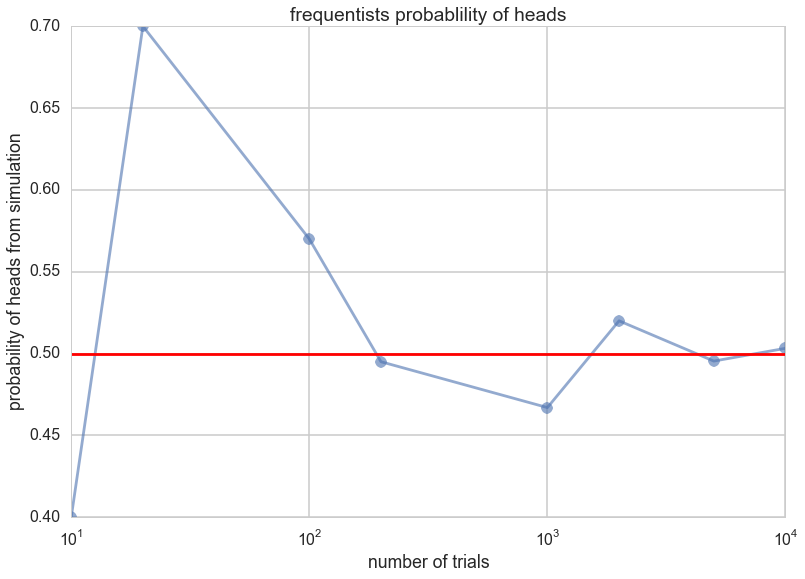

In [74]:
trials = [10,20,100,200,1000,2000,5000,10000]
plt.plot(trials, [np.sum(throw_a_coin(j)=='H')/np.float(j) for j in trials], 'o-', alpha=0.6);
plt.xscale("log")
plt.axhline(0.5, 0 ,1, color = 'r')
plt.ylabel('probability of heads from simulation')
plt.xlabel('number of trials');
plt.title('frequentists probablility of heads');

### A simple Election Model

In the last section, we made a simple simulation of a coin-toss on the computer from a fair-coin model which associated equal probability with heads and tails. Let us consider another model here, a table of probabilities that [PredictWise](http://www.predictwise.com/results/2012/president) made on October 2, 2012 for the US presidential elections. 
PredictWise aggregated polling data and, for each state, estimated the probability that the Obama or Romney would win. Here are those estimated probabilities:

In [80]:
predictwise = pd.read_csv("predictwise.csv").set_index('States')
predictwise.head()

,Obama,Romney,Votes
States,,,
Alabama,0.000,1.000,9
Alaska,0.000,1.000,3
Arizona,0.062,0.938,11
Arkansas,0.000,1.000,6
California,1.000,0.000,55


In [112]:
def simulation_election(model, n_sim):
    simulations = np.random.uniform(size=(51, n_sim))
    obama_votes = (simulations < model.Obama.values.reshape(-1,1))* model.Votes.values.reshape(-1, 1)
    return obama_votes.sum(axis = 0)

In [111]:
result = simulation_election(predictwise, 10000)
print(result>= 269).sum()

9964


In [115]:
def plot_simulation(simulation):
    plt.hist(simulation, bins=np.arange(200,538,1),
             label='simulations', align = 'left', normed=True)
    plt.legend(frameon=False, loc='upper left')
    plt.xlabel("Obama Electoral College Votes")
    plt.ylabel("Probability")
    sns.despine()

NameError: global name 'pwin' is not defined

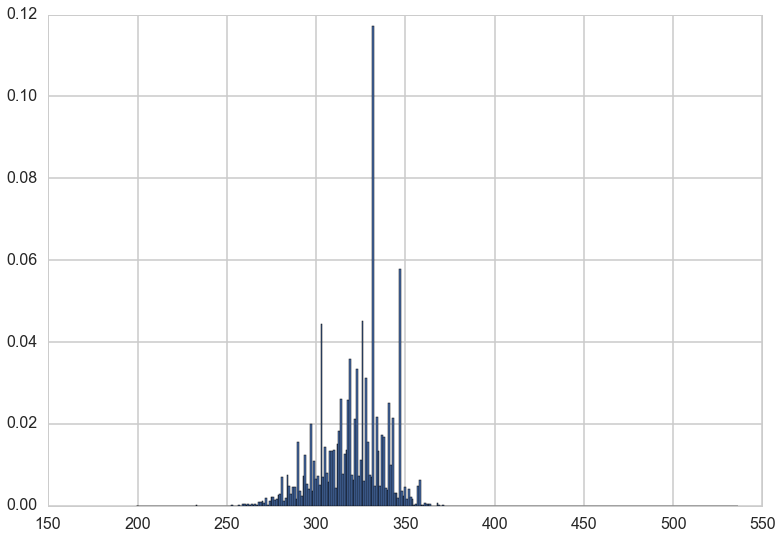

In [116]:
plot_simulation(result)

### Random Variable
A random variable is a mapping from a sample space to the set of real numbers. It assigns a real number to each outcome in the sample space.

Random variables provide the link from events and sample spaces to data, and it is their probability distribution that we are interested in.

A random variable is called discrete if it has a countable number of values ^[The technical definition of countable is that there is a 1-1 correspondence with the integers 1,2,3...]. The number of heads in 2 coin tosses is a discrete random variable.

In [123]:
## Bernoulli's Distribution

from scipy.stats import bernoulli
brv = bernoulli(p=0.3)
brv.rvs(size=20)

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0])

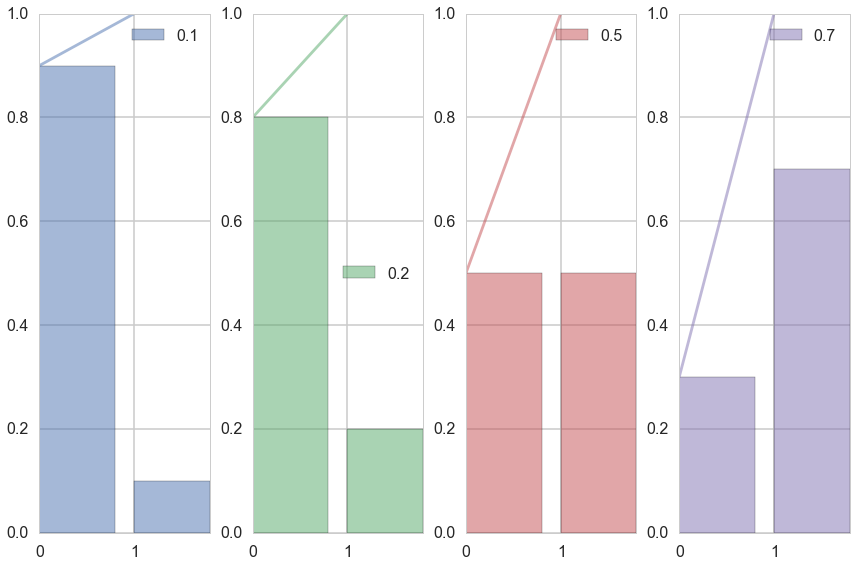

In [138]:
event_space=[0,1]
plt.figure(figsize=(12,8))
colors = sns.color_palette()
for i,p in enumerate([0.1,0.2,0.5,0.7]):
    ax = plt.subplot(1, 4, i+1)
    plt.bar(event_space, bernoulli.pmf(event_space,p), label=p, color=colors[i], alpha=0.5)
    plt.plot(event_space, bernoulli.cdf(event_space,p), color=colors[i], alpha=0.5)
    ax.xaxis.set_ticks(event_space)
    
    plt.ylim((0,1))
    plt.legend(loc= 0)
    
plt.tight_layout()
    

In [157]:
print np.sum(result == 300)

65


In [159]:
np.arange(0,60,2)

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32,
       34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58])

In [164]:
CDF = lambda x: np.float(np.sum(result<x))/10000

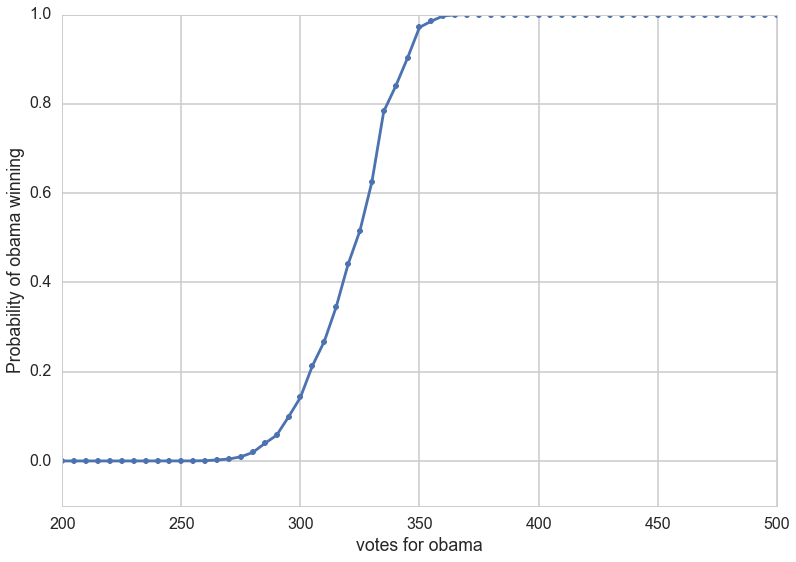

In [165]:
votelist = np.arange(0,540,5)
plt.plot(votelist,[ CDF(v) for v in votelist], '.-');
plt.ylim(-0.1,1.0)
plt.xlim(200,500)
plt.xlabel("votes for obama")
plt.ylabel("Probability of obama winning")

### Binomial Distribution

Binomial Distribution, the distribution of the number of successes in a sequence of n independent yes/no experiments, or Bernoulli trials, each of which yields success with probability p. The Binomial distribution is an extension of the Bernoulli when n>1 or the Bernoulli is the a special case of the Binomial when n=1.


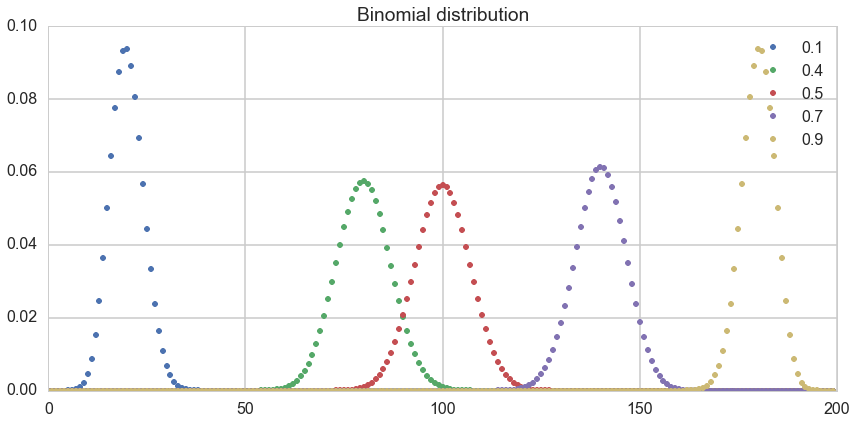

In [188]:
from scipy.stats import binom
plt.figure(figsize= (12,6))
k = np.arange(0,200)  ## binomial distribution for 200 trials
for p, color in zip([0.1,0.4,0.5,0.7,0.9], colors):
    rvbinom = binom(200, p)
    plt.plot(k,rvbinom.pmf(k),'.',color=color,label = p)
plt.title("Binomial distribution")
plt.tight_layout()
plt.legend()
    

### Note: Above examples are inspired by Harvards CS 109 class.